In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from k_nearest_neighbor import KNearestNeighbors
from sklearn.datasets import load_wine, load_diabetes

## Synthetic Data Testing

In [2]:
# Load classification data
class_data = pd.read_csv("classification_data.csv")
X_class = class_data.drop(columns=['label']).values
y_class = class_data['label'].values
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Load regression data
reg_data = pd.read_csv("regression_data.csv")
X_reg = reg_data.drop(columns=['target']).values
y_reg = reg_data['target'].values
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [3]:
# Train and Test Models
knn_classifier = KNearestNeighbors(k=5, task="classification")
knn_regressor = KNearestNeighbors(k=5, task="regression")

knn_classifier.fit(X_train_c, y_train_c)
knn_regressor.fit(X_train_r, y_train_r)

y_pred_c = knn_classifier.predict(X_test_c)
y_pred_r = knn_regressor.predict(X_test_r)

score_c = knn_classifier.score(X_test_c, y_test_c)
score_r = knn_regressor.score(X_test_r, y_test_r)

print(f"Classifier score (Accuracy): {score_c * 100:.2f}%")
print(f"Regressor score (MSE): {score_r:.4f}")

Classifier score (Accuracy): 80.00%
Regressor score (MSE): 1432.6378


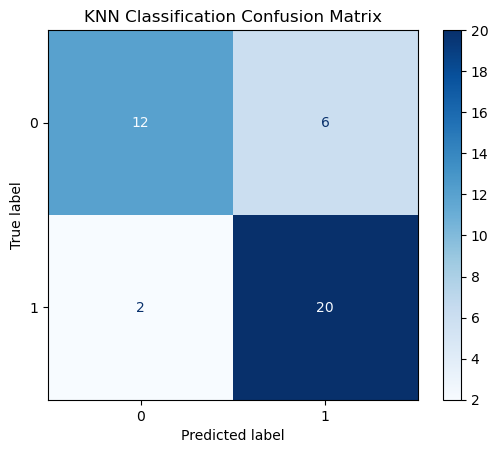

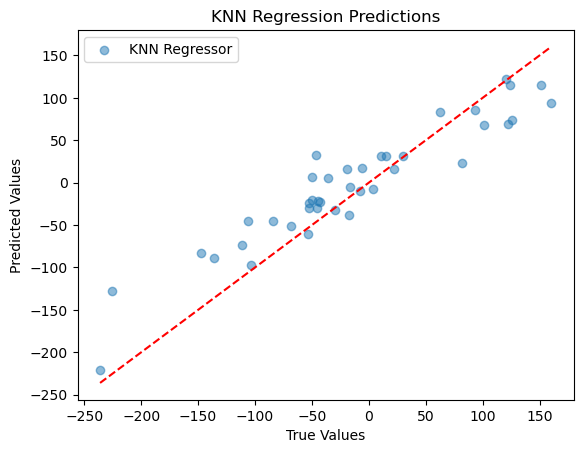

In [4]:
# Plot Results

# Classification
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("KNN Classification Confusion Matrix")
plt.show()

# Regression
plt.scatter(y_test_r, y_pred_r, label="KNN Regressor", alpha=0.5)
plt.plot([min(y_test_r), max(y_test_r)], [min(y_test_r), max(y_test_r)], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("KNN Regression Predictions")
plt.show()

# Wine Dataset (Classification) & Comparison

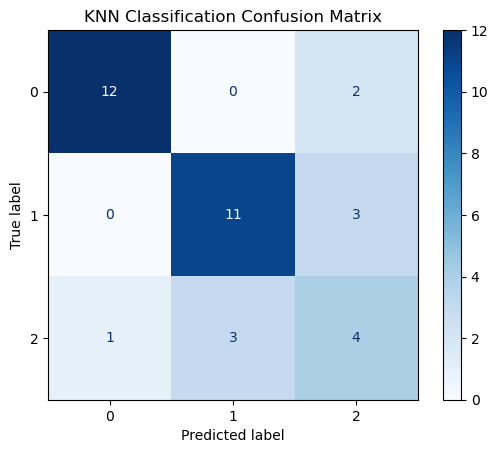

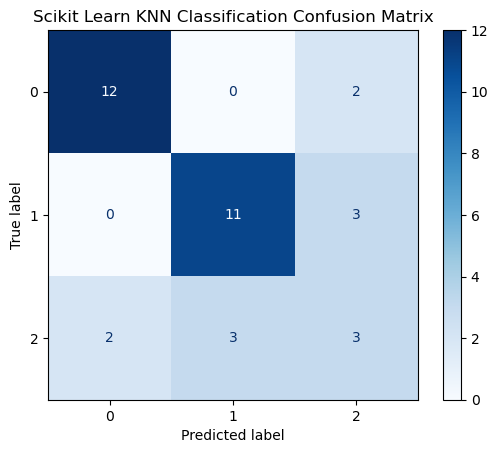

KNN Classification Accuracy (Custom): 0.7500
KNN Classification Accuracy (Sklearn): 0.7222


In [5]:
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

knn_classifier = KNearestNeighbors(k=5, task="classification")
knn_classifier.fit(X_train_c, y_train_c)
y_pred_c = knn_classifier.predict(X_test_c)
acc_c = knn_classifier.score(X_test_c, y_test_c)

cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("KNN Classification Confusion Matrix")
plt.show()

skl_classifier = KNeighborsClassifier(n_neighbors=5)
skl_classifier.fit(X_train_c, y_train_c)
y_pred_skl_c = skl_classifier.predict(X_test_c)
acc_skl_c = accuracy_score(y_test_c, y_pred_skl_c)

cm_skl = confusion_matrix(y_test_c, y_pred_skl_c)
disp_skl = ConfusionMatrixDisplay(confusion_matrix=cm_skl)
disp_skl.plot(cmap="Blues")
plt.title("Scikit Learn KNN Classification Confusion Matrix")
plt.show()

print(f"KNN Classification Accuracy (Custom): {acc_c:.4f}")
print(f"KNN Classification Accuracy (Sklearn): {acc_skl_c:.4f}")

## Diabetes Dataset (Regression) & Comparison

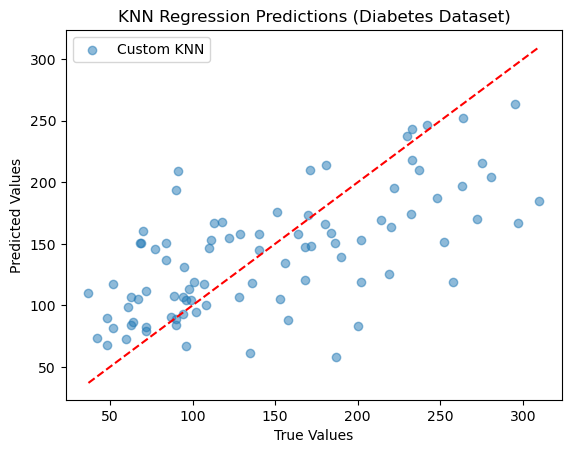

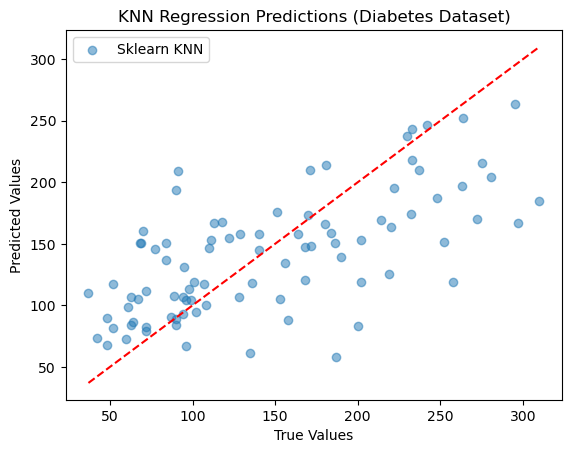

KNN Regression MSE (Custom): 3019.0755
KNN Regression MSE (Sklearn): 3019.0755


In [6]:
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

knn_regressor = KNearestNeighbors(k=5, task="regression")
knn_regressor.fit(X_train_r, y_train_r)
y_pred_r = knn_regressor.predict(X_test_r)
err_r = knn_regressor.score(X_test_r, y_test_r)

plt.scatter(y_test_r, y_pred_r, label="Custom KNN", alpha=0.5)
plt.plot([min(y_test_r), max(y_test_r)], [min(y_test_r), max(y_test_r)], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("KNN Regression Predictions (Diabetes Dataset)")
plt.show()

skl_regressor = KNeighborsRegressor(n_neighbors=5)
skl_regressor.fit(X_train_r, y_train_r)
y_pred_skl_r = skl_regressor.predict(X_test_r)
err_skl_r = mean_squared_error(y_test_r, y_pred_skl_r)

plt.scatter(y_test_r, y_pred_skl_r, label="Sklearn KNN", alpha=0.5)
plt.plot([min(y_test_r), max(y_test_r)], [min(y_test_r), max(y_test_r)], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("KNN Regression Predictions (Diabetes Dataset)")
plt.show()

print(f"KNN Regression MSE (Custom): {err_r:.4f}")
print(f"KNN Regression MSE (Sklearn): {err_skl_r:.4f}")